In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Early Stopping of Gradient Descent

In machine learning, **early stopping** is a form of **regularization** used to avoid overfitting.
As soon as the test error rearches a minimum, we will stop Gradient Descent.

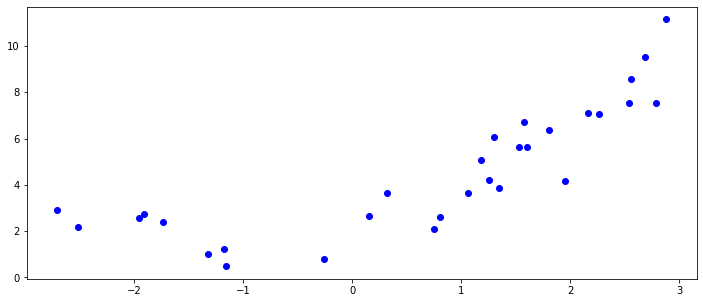

In [18]:
# generate some data
m = 30
x = 6*np.random.rand(m)-3
y = 0.5*x**2+x+2+np.random.randn(m)
plt.figure(figsize=(12,5))
plt.plot(x,y,'bo')

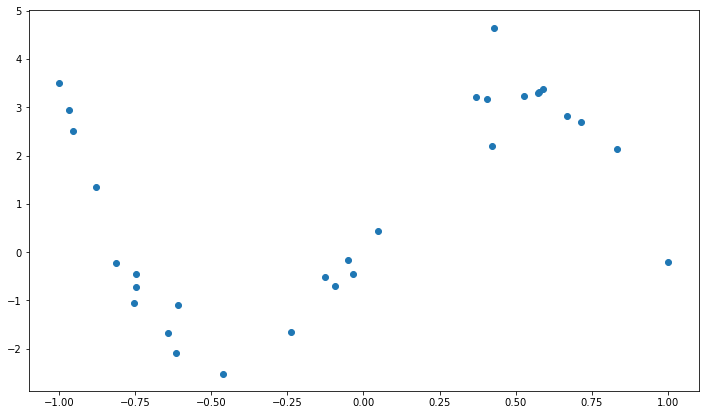

In [28]:
m = 30
x = -1 + 2*np.random.rand(m)
y = -10*x**3+2*x**2+8*x + 0.5*np.random.randn(m)

plt.figure(figsize=(12,7))
plt.plot(x,y,'o')

In [29]:
# split data into training and test se
x_train,y_train = x[:20],y[:20]
x_test,y_test = x[20:],y[20:]
m_train = len(y_train)
m_test = len(y_test)

Training Set Mean Squared Error: 0.17593381761260324
Test Set Mean Squared Error: 10087461.031688103


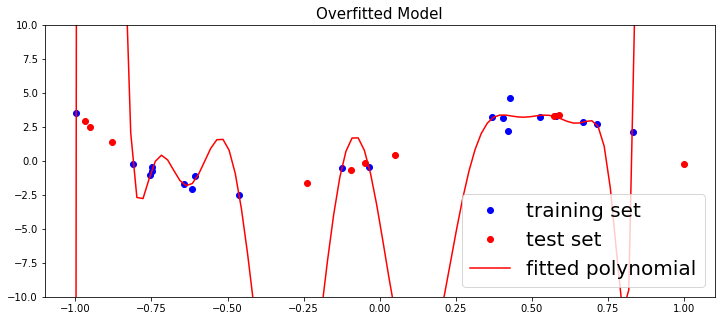

In [32]:
# overfitting example
degree = 15
X_train = np.ones((m_train,degree+1))
X_test = np.ones((m_test,degree+1))
for i in range(degree):
    X_train[:,i+1]=x_train**(i+1)
    X_test[:,i+1]=x_test**(i+1)
    
    
# fit a polynomial (to the training set)
theta = np.linalg.solve(X_train.T.dot(X_train),X_train.T.dot(y_train))

# plot data
plt.figure(figsize=(12,5))
plt.plot(x_train,y_train,'bo', label = 'training set')
plt.plot(x_test,y_test,'ro', label = 'test set')

# plot the fitted polynomial
m_plot = 100
x_plot = np.linspace(-1,1,m_plot) 
X_plot = np.ones((m_plot,degree+1))
for i in range(degree):
    X_plot[:,i+1]=x_plot**(i+1)
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-', label='fitted polynomial')

plt.legend(fontsize=20)
plt.title('Overfitted Model',fontsize = 15)
plt.ylim(-10,10)

# MSEs
MSE_train = np.linalg.norm(y_train-X_train@theta)**2/len(x_train)
MSE_test = np.linalg.norm(y_test-X_test@theta)**2/len(x_train)
print('Training Set Mean Squared Error: '+str(MSE_train))
print('Test Set Mean Squared Error: '+str(MSE_test))

In [62]:
'Gradient Descent'
lr = 0.5 # learning rate
epochs = 5000 # number of gradient descent iterations

# initialize MSE vectors
MSE_train = np.zeros(epochs) 
MSE_test = np.zeros(epochs)

theta = np.random.rand(degree+1) #random initialization
# gradient descent steps
for i in range(epochs):
    gradient = (2/m_train)*X_train.T.dot(X_train.dot(theta)-y_train)
    theta = theta - lr*gradient
    MSE_train[i] = np.linalg.norm(y_train-X_train.dot(theta))**2 / m_train
    MSE_test[i] = np.linalg.norm(y_test-X_test.dot(theta))**2 / m_test

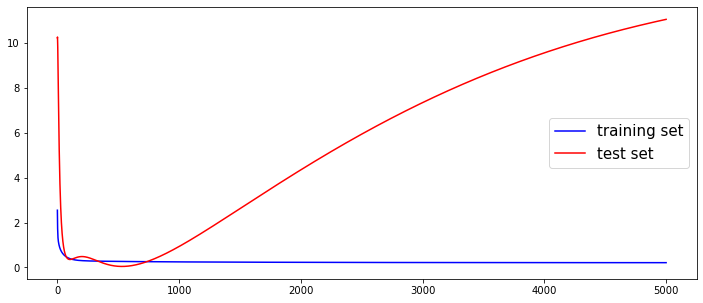

In [63]:
plt.figure(figsize=(12,5))
plt.plot(MSE_train,'b',label = 'training set')
plt.plot(MSE_test,'r', label = 'test set')
plt.legend(fontsize=15)

Training Set Mean Squared Error: 0.21115652903237808
Test Set Mean Squared Error: 5.487820616937382


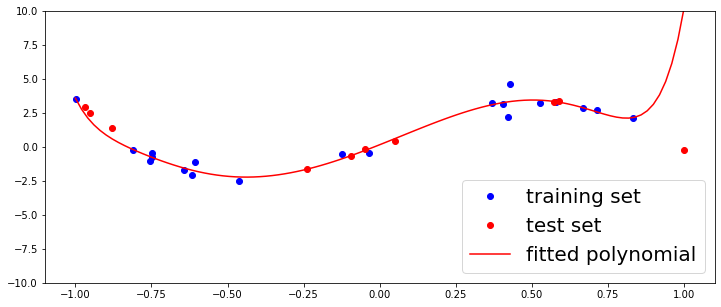

In [61]:
# plot data
plt.figure(figsize=(12,5))
plt.plot(x_train,y_train,'bo', label = 'training set')
plt.plot(x_test,y_test,'ro', label = 'test set')

# plot the fitted polynomial
m_plot = 100
x_plot = np.linspace(-1,1,m_plot) 
X_plot = np.ones((m_plot,degree+1))
for i in range(degree):
    X_plot[:,i+1]=x_plot**(i+1)
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-', label='fitted polynomial')

plt.legend(fontsize=20)
plt.ylim(-10,10)

# MSEs
MSE_train = np.linalg.norm(y_train-X_train@theta)**2/len(x_train)
MSE_test = np.linalg.norm(y_test-X_test@theta)**2/len(x_train)
print('Training Set Mean Squared Error: '+str(MSE_train))
print('Test Set Mean Squared Error: '+str(MSE_test))